In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Dataset has 318437 unique patients

In [2]:
data = pd.read_csv('train_data.csv')
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


# Data Cleaning and Preprocessing

## I want to check the total number of missing values in each column, and the 'data.isnull()' code will give me a dataframe of all the true and false values where a value will only be true if that particular value is null.

In [3]:
data.isnull()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Now the 'data.isnull().sum()' will give me the sum of the values across the column and rows so I get the total number of null values in each column.
## Bed Grade has '113' and City_Code_Patient has '4532' float null values

In [4]:
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

## I will have to make a function that takes the data from the 2 columns with float null values and fill the null values with the mean of that particular column.
## Particularly for the column 'Bed Grade' the function will take the data of the column, and fill it with the mean of that column and then store it back to the original column.

In [5]:
def preprocessing(data, columns):
    for column in columns:
        data[column] = data[column].fillna(data[column].mean())

## After the function has been made, I will have to use it.

In [6]:
preprocessing_columns = ['Bed Grade', 'City_Code_Patient']
preprocessing(data, preprocessing_columns)

## If we take a look at the 'Bed Grade' and 'City_Code_Patient' columns using the 'data.isnull().sum()' we can see that the values of those columns are not float null values anymore.

In [7]:
data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

## The first thing to recognize is that everything has to be in numerical form if I'm going to put this into the model, therefore I need to determine all the data types of each of these columns so we know which columns to handle in different ways.
## 'data.dtypes' will give me the list of all the data types of each column.

## The integer and float columns are already good for processing into the model, but the object models have strings in them that I have to deal with.
## So, I convert them into numerical values

In [8]:
data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [9]:
data.dtypes.index

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

## I'll need to make a function that will take all the unique values of each column with objects and covert them into numerical values.

## I want the column name to be one of those names, and I only want that name if the 'data.dtypes' of that particular column is equal to object

## So this is saying I am going to make this new list, and it's going to populate it with every column in the index of 'dtypes,' so every column only if that particular data type is an object, so this will give me a list of all the column names with object data.

## Then I'll create a dictionary, and I'll use the dictionary comprehension here to specify that we want a dictionary that matches a column name to the unique values of that column.

## So, for each, I'll create a dictionary that matches the column name to its unique value, and I'll say for every column in  columns.

In [10]:
data['Department'].unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [11]:
def objects_to_numerical(data):
    object_columns = [column for column in data.dtypes.index if data.dtypes[column] == 'object']
    numerical_columns = {column:data[column].unique() for column in object_columns}
    
    return numerical_columns

# Encoding

## Now it's time to find out which data type in object can be used as label encoding (ordered) or as one hot encoding (unordered).

## One Hot Encoding (Unordered): 'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility Code', 

## Label Encoding (Ordered): 'Type of Admission', 'Severity of Illness', 'Age', 'Stay'

In [12]:
objects_to_numerical(data)

{'Hospital_type_code': array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object),
 'Hospital_region_code': array(['Z', 'X', 'Y'], dtype=object),
 'Department': array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
        'surgery'], dtype=object),
 'Ward_Type': array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object),
 'Ward_Facility_Code': array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object),
 'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

## I’ll need to create a function called ‘onehot’ that takes in some data and a list of columns.
## And what I am going to do is for each of those columns I am going to create a dummies matrix by using the ‘pandas.getdummies’ 
## What ‘pandas.getdummies’ does if I just take a look at that replaced column with let's say department it will take each unique value and create a new column for it and return.
## ‘data = pd.concat([data, dummies], axis = 1)’ the list of data frames that I want to concatenate is data and dummies, I also wanted to specify that it's on the column axis and that will just be called ‘data’. Lastly, we want to drop the original column off the first axis inplace is ‘true’ then we return data.

## One Hot Encoding = non-ordered values
### {'Hospital_type_code': array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)
###  'Hospital_region_code': array(['Z', 'X', 'Y'], dtype=object),
###  'Department': array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease', 'surgery'], dtype=object),
###  'Ward_Type': array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object),
###  'Ward_Facility_Code': array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object),

In [13]:
def onehot(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat ([data, dummies], axis = 1)
        data.drop(column, axis = 1, inplace = True)
    return data
    

In [14]:
onehot_encoding = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code']

## So, with the dummies matrix I can now see it's in numerical form so all I must do is use it as the data instead of the original column so I create the dummies it can concatenate the dummy matrix onto the original data set.
## After passing the data in the one-hot columns as columns to the function and so data is now going to be a one hot encoded version of data.

In [15]:
data = onehot(data, onehot_encoding)
data.head(3)

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,R,S,T,U,A,B,C,D,E,F
0,1,8,3,3,2.0,31397,7.0,Emergency,Extreme,2,...,1,0,0,0,0,0,0,0,0,1
1,2,2,5,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,0,0,1
2,3,10,1,2,2.0,31397,7.0,Trauma,Extreme,2,...,0,1,0,0,0,0,0,0,1,0


## The label encoding of the categorical unique is next which we have a function for that get categorical unique function we made earlier of the data, and you can now see we only have four categorical columns because all the rest have been converted to one hot.
## So, these four are going to be the ordered four have type of admission severity of illness age and stay that I can sort these objects.


## Label Encoding = ordered values
###  'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
###  'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
###  'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30', '11-20', '0-10', '91-100'], dtype=object),
###  'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80', 'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [16]:
label_enc = objects_to_numerical(data)
label_enc

{'Type of Admission': array(['Emergency', 'Trauma', 'Urgent'], dtype=object),
 'Severity of Illness': array(['Extreme', 'Moderate', 'Minor'], dtype=object),
 'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        '11-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

## By using python sorted function to sort the list. for column in label_enc.
## for each column in the label_enc variable, I am going to sort the column so label_enc index at the column is going to simply be equal to the sorted version of it.


In [17]:
for column in label_enc:
    label_enc[column] = sorted(label_enc[column])

In [18]:
label_enc

{'Type of Admission': ['Emergency', 'Trauma', 'Urgent'],
 'Severity of Illness': ['Extreme', 'Minor', 'Moderate'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

## I used insert method to put the positions in order the 'Type of Admission' 0 for 'Urgent' 1 for 'Emergency' and 2 for 'Trauma'. Same thing with 'Severity of Illness' 0 for Minor, 1 for Moderate, and 2 for Extreme.
## The pop() method removes the item at the given index from the list and returns the removed item.
## The index() function searches for the 'string' from the start of the list and returns the lowest 'string' where the element appears. 

In [19]:
label_enc_list = label_enc['Type of Admission']
label_enc_list.insert(0, label_enc_list.pop(label_enc_list.index('Urgent')))
label_enc_list.insert(1, label_enc_list.pop(label_enc_list.index('Emergency')))
label_enc_list.insert(2, label_enc_list.pop(label_enc_list.index('Trauma')))


label_enc_list = label_enc['Severity of Illness']
label_enc_list.insert(0, label_enc_list.pop(label_enc_list.index('Minor')))
label_enc_list.insert(1, label_enc_list.pop(label_enc_list.index('Moderate')))
label_enc_list.insert(2, label_enc_list.pop(label_enc_list.index('Extreme')))


In [20]:
label_enc

{'Type of Admission': ['Urgent', 'Emergency', 'Trauma'],
 'Severity of Illness': ['Minor', 'Moderate', 'Extreme'],
 'Age': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100'],
 'Stay': ['0-10',
  '11-20',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days']}

## So now we're ready to convert these to label-encoded values, but before we do that, I want to save the values that these are mapped, because I'll be predicting one of these 11 classes in the future, and I want to know what the numerical values of those classes represent.
## The enumerate() function accepts a collection (such as a tuple) as input and produces an enumerate object as output.
## The enumerate() function appends a counter to the enumerate object's key.
## If we enumerate that, we can get an index value for each one, and then we can store each of those with a flipped version of value to index.
## This means that we'll get the index and the value for each of these entries, such as '0-10' will be zero, '11-20' one, '21-30' will be two, and '31-40' will be three, and that will be the index value. 
## I'll then flip it, so we'll get a dictionary that matches a value from 0 to 10 to an index.

In [21]:
enumerate_stay = {value: index for index, value in enumerate (label_enc['Stay'])}
enumerate_stay

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 'More than 100 Days': 10}

## The unique values I'm sending through the function will simply be the label_enc dictionary, and I'll essentially say acceptable for that column as we iterate through the columns, which will be the column names since this is one of them.
## This is another iteration where we're just getting the column names, so for each column name we'll get the column data and use apply to map a function onto every element in that column.
## The function we'll map will take some x and return the index of that value in our dictionary.
## So, if we had '0-10' as our value for x, for example, we would say that x is '0-10'. That's one value in 'Stay' followed by '0-10' map value at 0.
## The index, not the index of 0 to 10, is the index; we shall obtain the index of 0 to 10 from the unique list on the first day, which was difficult.
## So, our value is 0, and by applying it, we're really altering the value of '0-10' to 0, and we'll do this for each value in the 'Stay' column with the designator function.

In [22]:
def designator(data, label_enc):
    for column in label_enc:
        data[column] = data[column].apply(lambda x: label_enc[column].index(x))

In [23]:
designator(data, label_enc)
data['Stay']

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [24]:
(data.dtypes == 'object').sum()


0

In [25]:
data.head(3)

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,R,S,T,U,A,B,C,D,E,F
0,1,8,3,3,2.0,31397,7.0,1,2,2,...,1,0,0,0,0,0,0,0,0,1
1,2,2,5,2,2.0,31397,7.0,2,2,2,...,0,1,0,0,0,0,0,0,0,1
2,3,10,1,2,2.0,31397,7.0,2,2,2,...,0,1,0,0,0,0,0,0,1,0


# Some Descriptive Statistics

In [26]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,...,R,S,T,U,A,B,C,D,E,F
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,...,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,1.325841,0.908463,3.284099,...,0.401796,0.244299,0.004638,0.000028,0.087634,0.110401,0.111365,0.162697,0.173820,0.354081
std,91925.276847,8.633755,3.102535,1.168171,0.872991,37979.936440,4.711377,0.724078,0.662886,1.764061,...,0.490262,0.429671,0.067947,0.005316,0.282762,0.313390,0.314585,0.369090,0.378956,0.478235
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,2.000000,1.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,2.000000,2.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
data['Stay'].value_counts()

2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

# Predictive Analysis

## Before the analysis I need to create a y value. The y column and an x dataframe so y is going to be what I am trying to predict so it's just going to be the length of stay or just the 'stay' column and x will be everything except the state column.

In [28]:
data.set_index('case_id', inplace = True)

In [29]:
y = data ['Stay']
X = data.drop('Stay', axis = 1)

## I don't want to scale the 'case_id' and I also don't want to use it in the data

In [30]:
y

case_id
1         0
2         4
3         3
4         4
5         4
         ..
318434    1
318435    3
318436    1
318437    1
318438    0
Name: Stay, Length: 318438, dtype: int64

In [31]:
X

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,R,S,T,U,A,B,C,D,E,F
case_id,,,,,,,,,,,,,,,,,,,,,
1,8,3,3,2.0,31397,7.0,1,2,2,5,...,1,0,0,0,0,0,0,0,0,1
2,2,5,2,2.0,31397,7.0,2,2,2,5,...,0,1,0,0,0,0,0,0,0,1
3,10,1,2,2.0,31397,7.0,2,2,2,5,...,0,1,0,0,0,0,0,0,1,0
4,26,2,2,2.0,31397,7.0,2,2,2,5,...,1,0,0,0,0,0,0,1,0,0
5,26,2,2,2.0,31397,7.0,2,2,2,5,...,0,1,0,0,0,0,0,1,0,0
6,23,6,2,2.0,31397,7.0,2,2,2,5,...,0,1,0,0,0,0,0,0,0,1
7,32,9,1,3.0,31397,7.0,1,2,2,5,...,0,1,0,0,0,1,0,0,0,0
8,23,6,4,3.0,31397,7.0,2,2,2,5,...,0,0,0,0,0,0,0,0,0,1
9,1,10,2,4.0,31397,7.0,2,2,2,5,...,1,0,0,0,0,1,0,0,0,0


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

## So this will fit the scalar to the data in X and then transform X accordingly so it'll find the minimum and the range of values that a column takes on and it'll compress it down to have unit variance for every single column.
##  I need to turn X into a data frame because it'll actually return a numpy array, in turn will lose these column names and the indices so to retain the column names when we create the new data frame.
## Now for X everything is as it is I had it with the same indices and columns indices and columns except everything is scaled each column is scaled to have unit variance. Basically, this will make it easier for my models.

In [33]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index = X.index, columns = X.columns)

In [34]:
X

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,...,R,S,T,U,A,B,C,D,E,F
case_id,,,,,,,,,,,,,,,,,,,,,
1,-1.195176,-0.571055,-0.169177,-0.716855,-0.904442,-0.053458,-0.450008,1.646648,-0.727923,0.461600,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
2,-1.890124,0.073580,-1.025217,-0.716855,-0.904442,-0.053458,0.931061,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
3,-0.963527,-1.215691,-1.025217,-0.716855,-0.904442,-0.053458,0.931061,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,2.180153,-0.740394
4,0.889668,-0.893373,-1.025217,-0.716855,-0.904442,-0.053458,0.931061,1.646648,-0.727923,0.461600,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394
5,0.889668,-0.893373,-1.025217,-0.716855,-0.904442,-0.053458,0.931061,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,2.268564,-0.458683,-0.740394
6,0.542194,0.395897,-1.025217,-0.716855,-0.904442,-0.053458,0.931061,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
7,1.584615,1.362850,-1.881257,0.428634,-0.904442,-0.053458,-0.450008,1.646648,-0.727923,0.461600,...,-0.819554,1.758792,-0.068263,-0.005316,-0.309922,2.838636,-0.354009,-0.440807,-0.458683,-0.740394
8,0.542194,0.395897,0.686863,0.428634,-0.904442,-0.053458,0.931061,1.646648,-0.727923,0.461600,...,-0.819554,-0.568572,-0.068263,-0.005316,-0.309922,-0.352282,-0.354009,-0.440807,-0.458683,1.350633
9,-2.005949,1.685167,-1.025217,1.574123,-0.904442,-0.053458,0.931061,1.646648,-0.727923,0.461600,...,1.220175,-0.568572,-0.068263,-0.005316,-0.309922,2.838636,-0.354009,-0.440807,-0.458683,-0.740394


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [36]:
# from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier()
MLP_model.fit(X_train, y_train)

MLPClassifier()

In [38]:
MLPClassifier()

MLPClassifier()

In [39]:
# from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
# from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

GaussianNB()

In [41]:
# from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# from sklearn.tree import DecisionTreeClassifier
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier()

## Shapes are consequences of the model's configuration. Shapes are tuples representing how many elements an array or tensor has in each dimension.
## Ex: a shape (30,4,10) means an array or tensor with 3 dimensions, containing 30 elements in the first dimension, 4 in the second and 10 in the third, totaling 30*4*10 = 1200 elements or numbers.
### Each type of layer requires the input with a certain number of dimensions: Dense layers require inputs as (batch_size, input_size)
### Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output.

In [49]:
all_models= {
    'LogisticRegrsssion': LogisticRegression(),
    'MLP Classifier' : MLPClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'Decision Tree Classifier' : DecisionTreeClassifier()
    
        
   
}
for name,model in all_models.items():
    model.fit(X_train,y_train)
    print(name+ ': trained')

LogisticRegrsssion: trained
MLP Classifier: trained
RandomForestClassifier: trained
GaussianNB: trained
KNeighborsClassifier: trained
Decision Tree Classifier: trained


In [52]:
for name,model in all_models.items():
    print(name+ ": {:.2f}%".format(model.score(X_test,y_test) * 100))

LogisticRegrsssion: 38.70%
MLP Classifier: 41.92%
RandomForestClassifier: 39.75%
GaussianNB: 10.59%
KNeighborsClassifier: 32.84%
Decision Tree Classifier: 30.13%


In [54]:
prediction_y = log_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.29      0.01      0.03      4683
           1       0.39      0.44      0.42     15777
           2       0.40      0.66      0.50     17370
           3       0.32      0.20      0.25     10951
           4       0.00      0.00      0.00      2337
           5       0.38      0.48      0.42      7134
           6       0.00      0.00      0.00       552
           7       0.00      0.00      0.00      2068
           8       0.00      0.00      0.00       963
           9       0.00      0.00      0.00       536
          10       0.52      0.35      0.42      1317

    accuracy                           0.39     63688
   macro avg       0.21      0.20      0.18     63688
weighted avg       0.34      0.39      0.34     63688



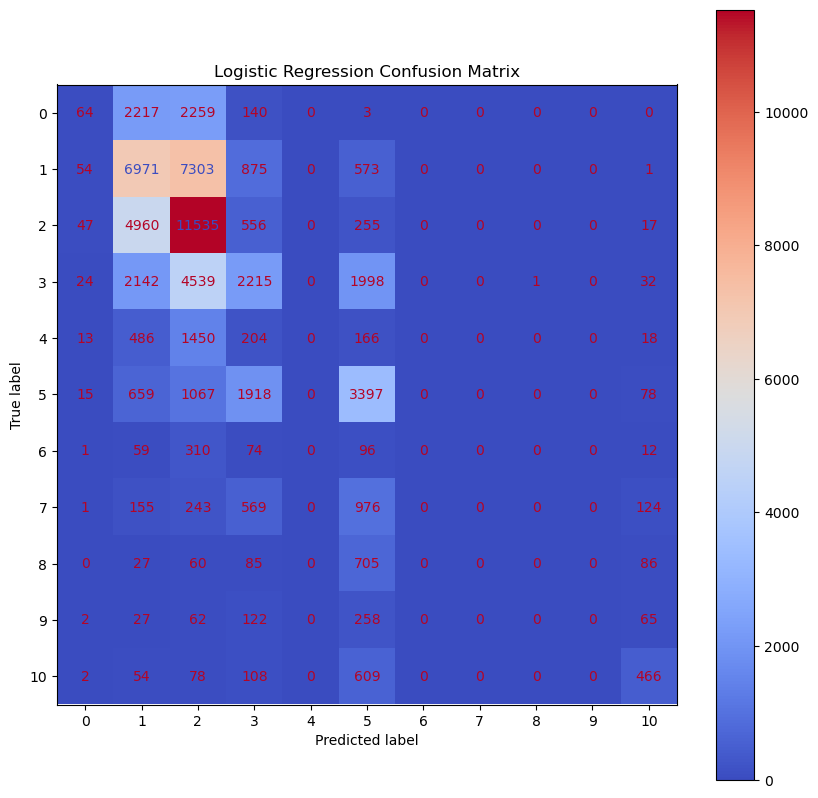

In [142]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(log_model, X_test, y_test, cmap = 'coolwarm', ax = ax)
plt.title ('Logistic Regression Confusion Matrix')
plt.savefig("Logistic Regression.png")

In [67]:
prediction_y = MLP_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.40      0.16      0.23      4683
           1       0.42      0.54      0.47     15777
           2       0.42      0.61      0.50     17370
           3       0.40      0.22      0.29     10951
           4       0.00      0.00      0.00      2337
           5       0.40      0.49      0.44      7134
           6       0.00      0.00      0.00       552
           7       0.17      0.00      0.00      2068
           8       0.32      0.20      0.24       963
           9       0.00      0.00      0.00       536
          10       0.51      0.42      0.46      1317

    accuracy                           0.42     63688
   macro avg       0.28      0.24      0.24     63688
weighted avg       0.38      0.42      0.38     63688



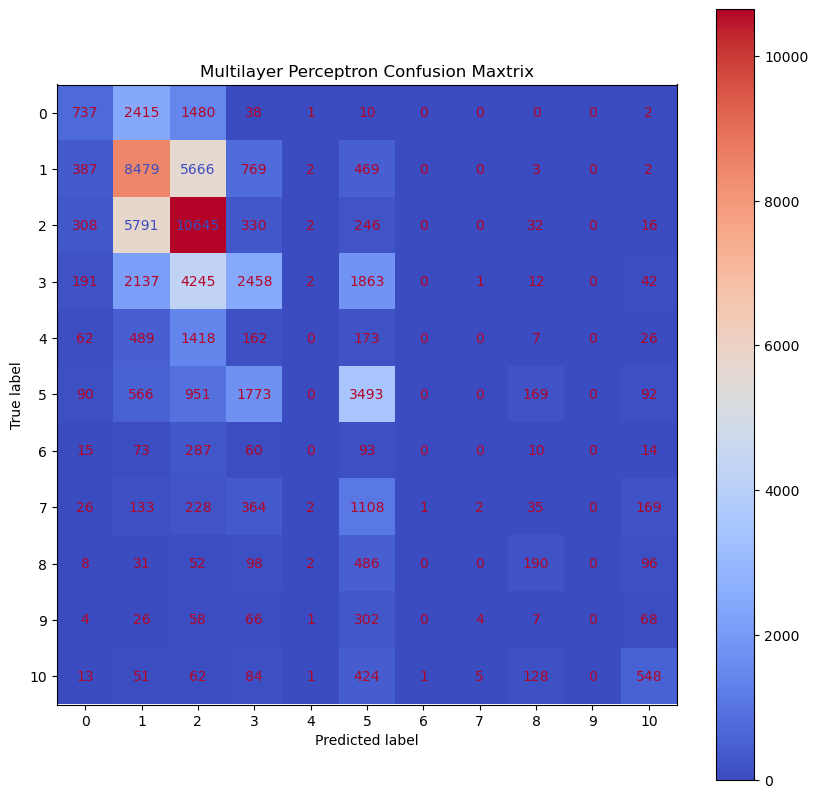

In [141]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(MLP_model, X_test, y_test, cmap = 'coolwarm', ax = ax)
plt.title ('Multilayer Perceptron Confusion Maxtrix')
plt.savefig("Multilayer Perceptron.png")

In [69]:
prediction_y = RFC_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.35      0.18      0.24      4683
           1       0.40      0.46      0.43     15777
           2       0.42      0.58      0.48     17370
           3       0.34      0.26      0.29     10951
           4       0.13      0.02      0.03      2337
           5       0.41      0.47      0.44      7134
           6       0.30      0.03      0.05       552
           7       0.33      0.09      0.14      2068
           8       0.44      0.22      0.29       963
           9       0.54      0.08      0.13       536
          10       0.59      0.48      0.53      1317

    accuracy                           0.40     63688
   macro avg       0.39      0.26      0.28     63688
weighted avg       0.38      0.40      0.38     63688



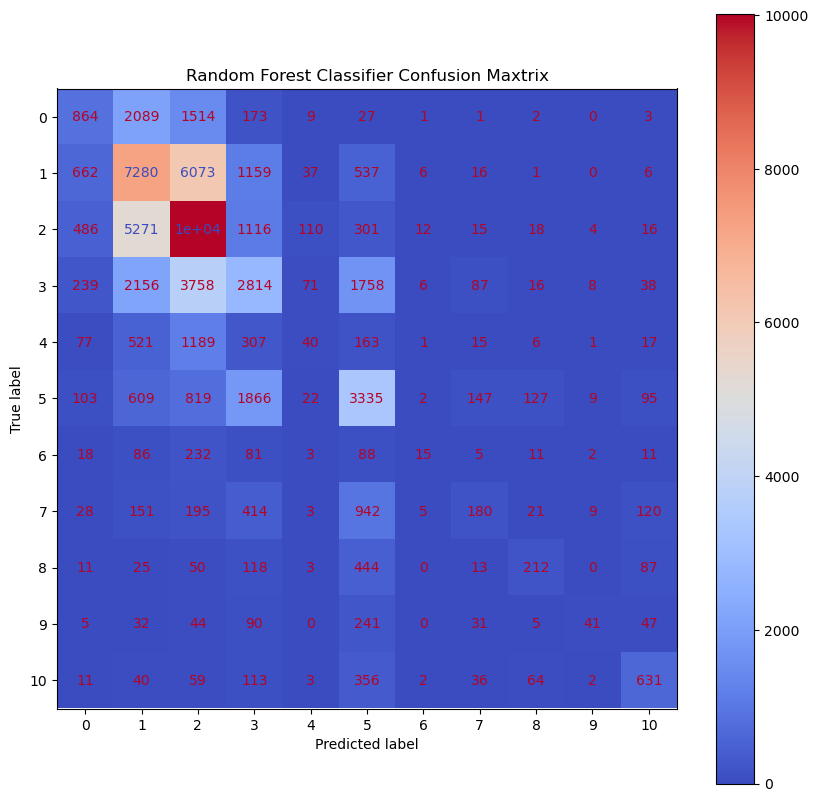

In [143]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RFC_model, X_test, y_test, cmap = 'coolwarm', ax = ax)
plt.title ('Random Forest Classifier Confusion Maxtrix')
plt.savefig("Random Forest Classifer.png")

In [70]:
prediction_y = GNB_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4683
           1       0.00      0.00      0.00     15777
           2       0.00      0.00      0.00     17370
           3       0.00      0.00      0.00     10951
           4       0.05      0.57      0.09      2337
           5       0.15      0.66      0.25      7134
           6       0.02      0.03      0.02       552
           7       0.08      0.02      0.03      2068
           8       0.03      0.05      0.04       963
           9       0.00      0.00      0.00       536
          10       0.14      0.45      0.21      1317

    accuracy                           0.11     63688
   macro avg       0.04      0.16      0.06     63688
weighted avg       0.03      0.11      0.04     63688



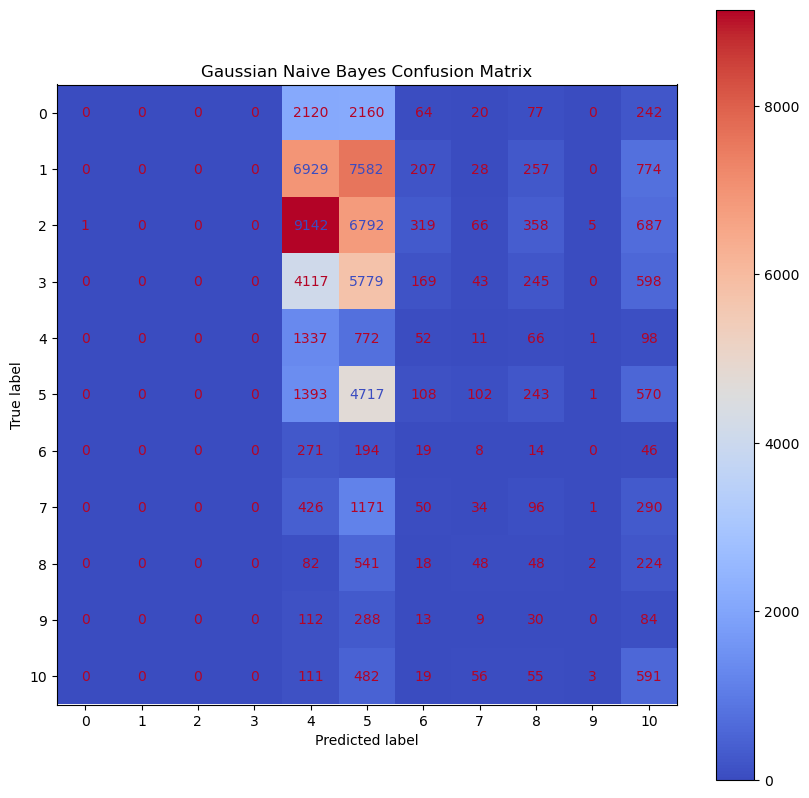

In [144]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(GNB_model, X_test, y_test, cmap = 'coolwarm', ax = ax)
plt.title ('Gaussian Naive Bayes Confusion Matrix')
plt.savefig("Gaussian Naive Bayes.png")

In [114]:
prediction_y = KNN_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.19      0.20      0.19      4683
           1       0.34      0.46      0.39     15777
           2       0.38      0.45      0.41     17370
           3       0.27      0.21      0.24     10951
           4       0.07      0.02      0.03      2337
           5       0.36      0.27      0.31      7134
           6       0.05      0.00      0.01       552
           7       0.16      0.05      0.08      2068
           8       0.23      0.08      0.12       963
           9       0.15      0.02      0.04       536
          10       0.57      0.29      0.39      1317

    accuracy                           0.33     63688
   macro avg       0.25      0.19      0.20     63688
weighted avg       0.31      0.33      0.31     63688



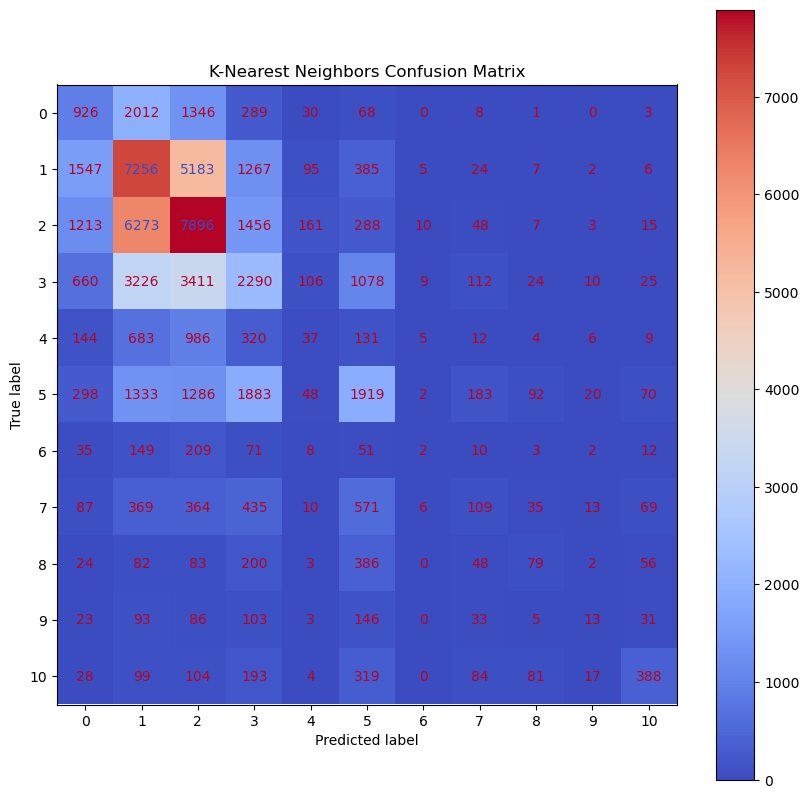

In [145]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(KNN_model, X_test, y_test, cmap = 'coolwarm', ax = ax)
plt.title ('K-Nearest Neighbors Confusion Matrix')
plt.savefig("K-Nearest Neighbors.png")

In [74]:
prediction_y = DTC_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.20      0.20      0.20      4683
           1       0.34      0.34      0.34     15777
           2       0.38      0.38      0.38     17370
           3       0.25      0.25      0.25     10951
           4       0.07      0.07      0.07      2337
           5       0.32      0.32      0.32      7134
           6       0.04      0.04      0.04       552
           7       0.16      0.16      0.16      2068
           8       0.23      0.24      0.24       963
           9       0.11      0.13      0.12       536
          10       0.38      0.39      0.38      1317

    accuracy                           0.30     63688
   macro avg       0.23      0.23      0.23     63688
weighted avg       0.30      0.30      0.30     63688



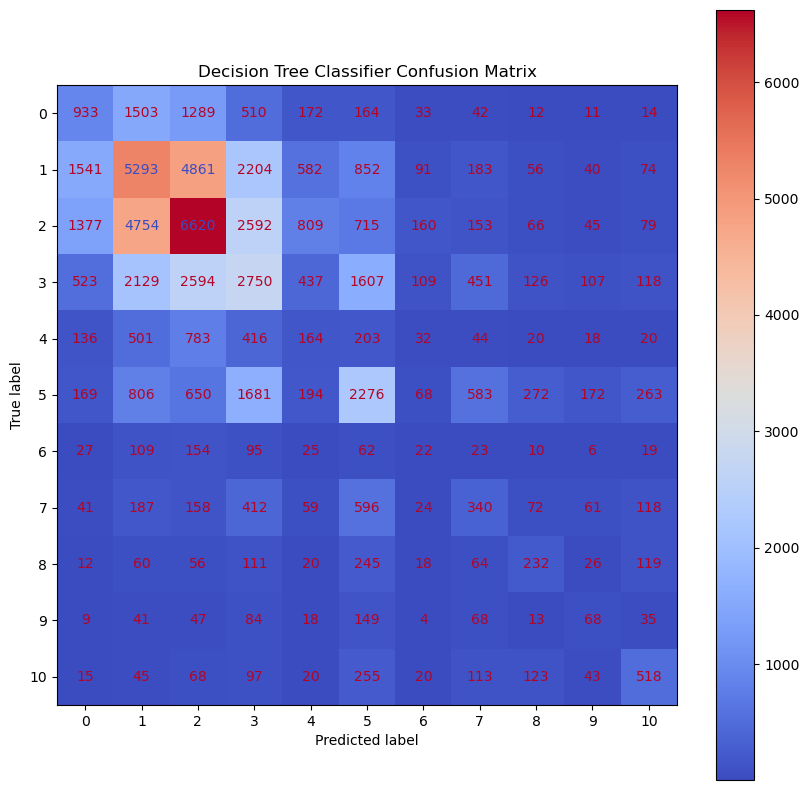

In [146]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(DTC_model, X_test, y_test, cmap = 'coolwarm', ax = ax)
plt.title ('Decision Tree Classifier Confusion Matrix')
plt.savefig("Decision Tree Classifier.png")